# Reducción de dimensión: Métodos no lineales

In [20]:
%matplotlib inline

En muchos problemas del mundo real, los datos tienen una alta dimensionalidad, lo que dificulta su visualización, procesamiento y análisis.

La **reducción de dimensionalidad no lineal** busca proyectar estos datos en espacios de menor dimensión mientras se conserva su estructura interna, especialmente cuando las relaciones entre características no son lineales.

**El aprendizaje de variedades** (manifold learning) asume que los datos de alta dimensión yacen sobre una variedad de menor dimensión incrustada en el espacio original. El objetivo es descubrir esa estructura subyacente.

Entre los métodos más populares se encuentran:
- **Kernel PCA**: una extensión de PCA que utiliza funciones kernel para capturar relaciones no lineales.
- **t-SNE**: técnica de visualización que preserva bien la estructura de vecindades locales.
- **UMAP**: método rápido y flexible que equilibra la preservación de estructuras locales y globales.
- **LLE (Local Linear Embedding)**: método que conserva relaciones lineales locales para mapear datos en espacios de menor dimensión.

Estos algoritmos son ampliamente utilizados en áreas como visualización de datos, preprocesamiento para aprendizaje automático y análisis exploratorio.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

## Kernel PCA

Kernel PCA (Principal Component Analysis) extiende PCA usando métodos kernel para permitir la reducción de dimensión no lineal.

De manera similar a como se formula PCA, la clave se encuentra en la matriz de covarianza:
 $$C = \frac{1}{N}\sum_{j=1}^N {\bf{x}}_j{\bf{x}}_j^{\top} = \frac{1}{N}{\bf{X}}^{\top}{\bf{X}}$$

Asumiendo que existe una función $\phi$ que transforma los vectores de características:

$$C = \frac{1}{N}\sum_{j=1}^N \phi({\bf{x}}_j)\phi({\bf{x}}_j)^{\top}$$

Los componentes principales en este caso se encuentran resolviendo el siguiente problema de valores propios:

$$N\lambda {\bf{u}} = {\bf{K}}{\bf{u}}$$

donde ${\bf{K}} = {\bf{X}}{\bf{X}}^{\top}; \;\; K_{ij} = \langle \phi({\bf{x}}_i),\phi({\bf{x}}_j)\rangle$

Tenga en cuenta que la matriz $\bf{K}$, es de $N \times N$, no de $d \times d$. Recuerden que la dimensión del espacio al que la función $\phi(\cdot)$ transforma los datos no es necesariamente conocido.

**Nota**: Kernel PCA no está diseñado inherentemente para proyectar nuevas muestras. Por lo que el procedimiento se hace a través de una aproximación que implica estimar el kernel entre la nueva muestra y las muestras de entrenamiento.

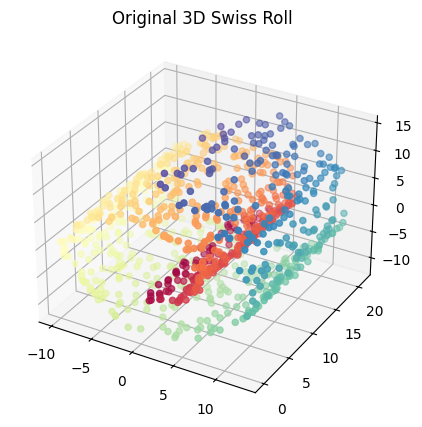

In [4]:
#Generación de datos
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original 3D Swiss Roll")
plt.show()

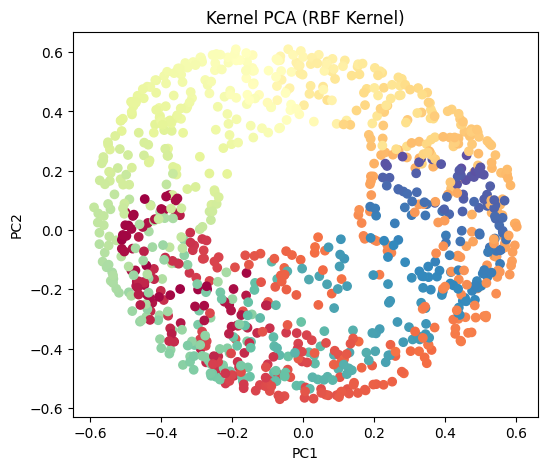

In [5]:
#Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Kernel PCA (RBF Kernel)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [6]:
# Transform new data with Kernel PCA
X_new = X[:5] + np.random.normal(0, 0.1, X[:5].shape)
X_new_kpca = kpca.transform(X_new)
print("\nTransformed new data (Kernel PCA):\n", X_new_kpca)


Transformed new data (Kernel PCA):
 [[ 0.22748288  0.42034671]
 [ 0.53470758  0.07313812]
 [-0.25807952 -0.30057659]
 [-0.37999105  0.27971592]
 [ 0.12504965 -0.53991686]]


[Otro ejemplo](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html):

In [7]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

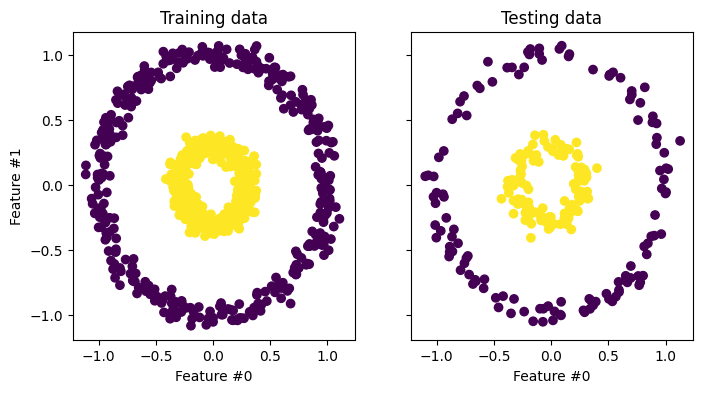

In [8]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [12]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

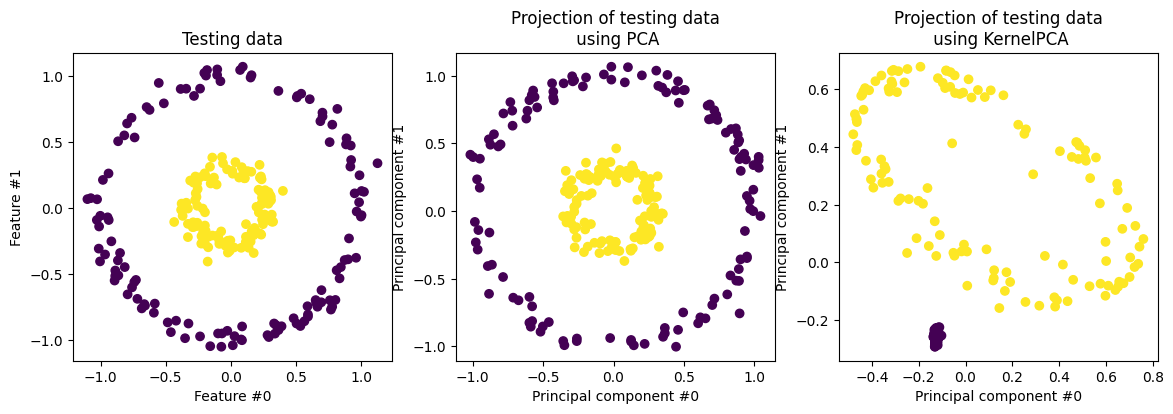

In [13]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

**Reconstrucción**

In [14]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

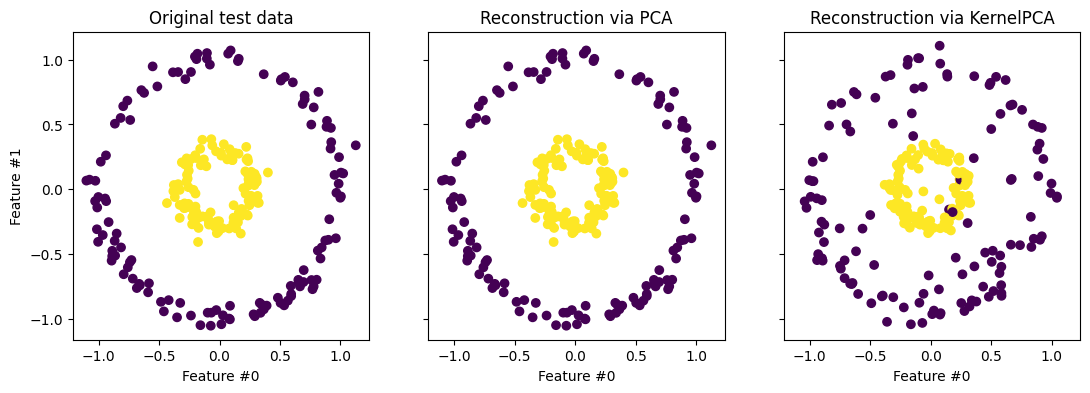

In [15]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")


## t-SNE (t-distributed Stochastic Neighbor Embedding)


t-SNE es una técnica nolinea usando principalmente para propósitos de visualización. t-SNE se ejecuta en dos pasos: 

- En primer lugar construye una distribución de probabilidad condicional sobre parejas de muestras en el espacio original, de forma tal que las muestras semejantes reciben alta probabilidad de ser escogidas, mientras que las muestras muy diferentes reciben baja probabilidad de ser escogidas. El concepto de "semejanza" se basa en la distancia entre puntos y densidad en las proximidades de un punto. 

$$p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$$

$$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$

- En segundo lugar, t-SNE lleva los puntos del espacio de alta dimensionalidad al espacio de baja dimencionalidad a través de un proceso de optimización en el que se intenta conservar los valores de las probabilidades $p_{ij}$. Para ello se define una nueva función de distribución en el espacio transformado:
$$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_k \sum_{l \neq k} (1 + \lVert \mathbf{y}_k - \mathbf{y}_l\rVert^2)^{-1}}$$

y la ubicación de los puntos $\mathbf{y}$ se realiza minimizando la divergencia Kullback-Leibler entre las dos distribuciones con respecto a las posiciones de los puntos en el mapa. Dicho con otras palabras: t-SNE intenta reproducir la distribución que existía en el espacio original en el espacio final.

t-SNE preserva las vecindades locales pero no es apropiada para generalizar.

**Nota**: Si el número de dimensiones es muy alto, Scikit-Learn recomienda en su documentación utilizar un método de reducción de dimensionalidad previo (como PCA) para reducir el conjunto de datos a un número de dimensiones razonable (por ejemplo 50), lo que reducirá el ruido y aligerará la ejecución de t-SNE.

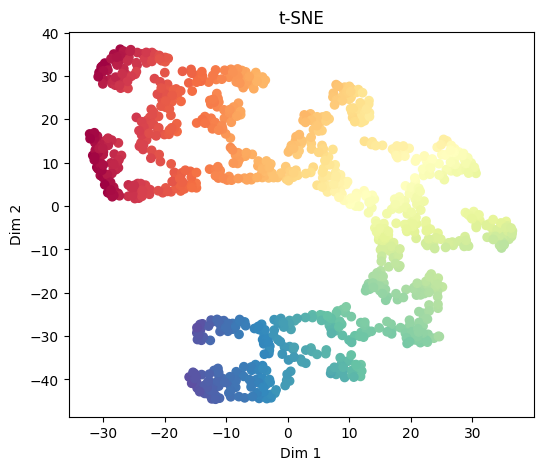

In [17]:
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='random', random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

**En el segundo ejemplo...**

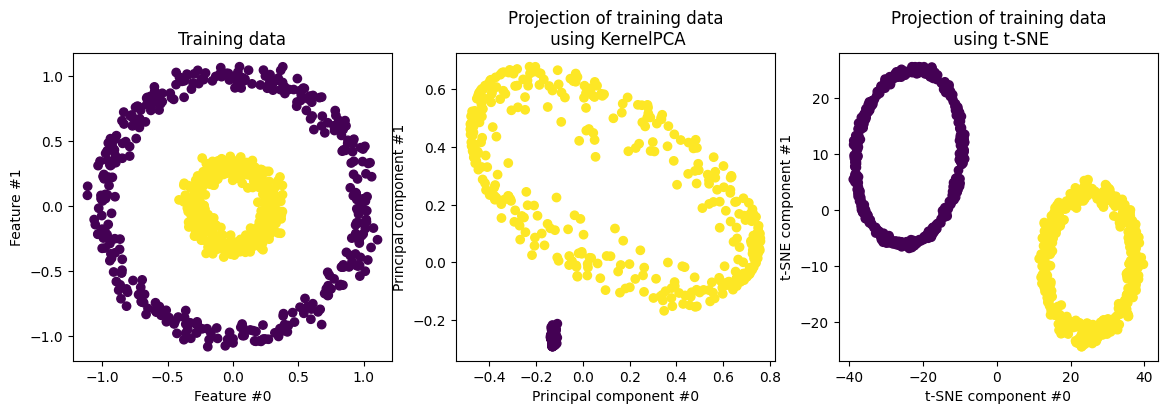

In [23]:
fig, (orig_data_ax, kernel_pca_proj_ax, tsne_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Training data")

X_train_kernel_pca = kernel_pca.transform(X_train)

kernel_pca_proj_ax.scatter(X_train_kernel_pca[:, 0], X_train_kernel_pca[:, 1], c=y_train)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of training data\n using KernelPCA")

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='random', random_state=42)
X_tsne = tsne.fit_transform(X_train)

tsne_proj_ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
tsne_proj_ax.set_ylabel("t-SNE component #1")
tsne_proj_ax.set_xlabel("t-SNE component #0")
_ = tsne_proj_ax.set_title("Projection of training data\n using t-SNE")

## UMAP (Uniform Manifold Approximation and Projection) 


[UMAP](https://umap-learn.readthedocs.io/en/latest/) es una técnica de reducción de dimensión basada en el aprendizaje de variedades que puede ser usada para propósitos de visualización, similar a t-SNE, pero también como técnica general de reducción de dimensión no lineal.

El algoritmo se fundamenta en suposiciones sobre los datos relacionadas con la [variedad de Riemann](https://en.wikipedia.org/wiki/Riemannian_manifold) y su comprensión implica tener claros algunos conceptos de geometría diferencial que no revisaremos; el lector interesado puedde consultar el paper original en el siguiente [link](https://arxiv.org/pdf/1802.03426).

De manera general podemos decir que el algoritmo se basada en dos fases:
- Dada una métrica $D$, se construye un grafo sopesado de $k$-vecinos (cada par de vecinos tiene asociado un peso), a partir de los vectores originales $\bf{x}$
- Posteriormente, se define un algoritmo de optimización sobre vectores $\bf{y}$ de baja dimensión que intente reproducir la topología del grafo original.

/Users/julian/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


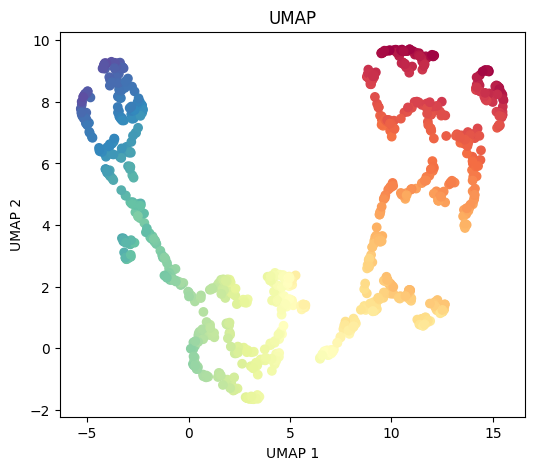

In [21]:
# UMAP
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [22]:
# Transform new data with UMAP
X_new_umap = reducer.transform(X_new)
print("\nTransformed new data (UMAP):\n", X_new_umap)


Transformed new data (UMAP):
 [[ 8.953017    2.5533378 ]
 [-3.7371802   8.676173  ]
 [-0.56244224  2.11647   ]
 [ 2.5500183   1.577043  ]
 [13.997436    6.824082  ]]


**En el segundo ejemplo...**

In [24]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
reducer.fit(X_train)
X_test_umap = reducer.transform(X_test)

/Users/julian/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


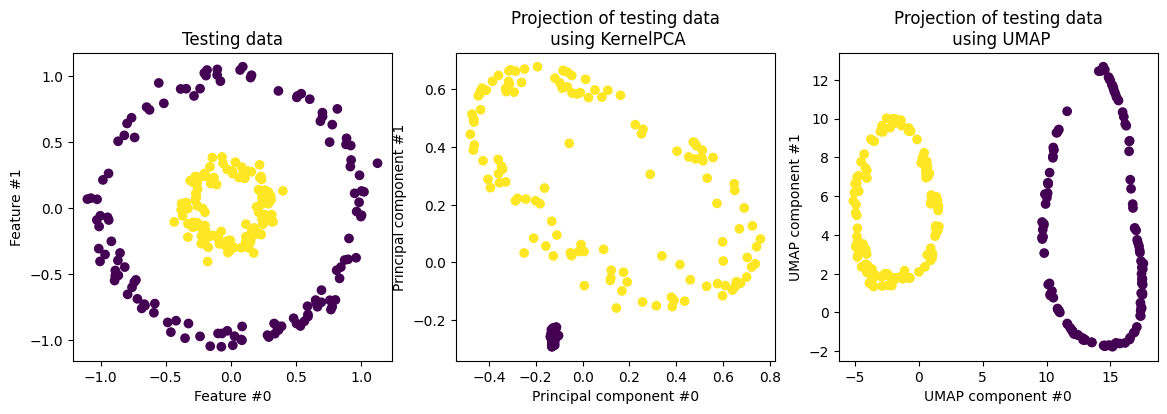

In [25]:
fig, (orig_data_ax, kernel_pca_proj_ax, umap_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

umap_proj_ax.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test)
umap_proj_ax.set_ylabel("UMAP component #1")
umap_proj_ax.set_xlabel("UMAP component #0")
_ = umap_proj_ax.set_title("Projection of testing data\n using UMAP")

**Reconstrucción**

In [26]:
X_reconstructed_umap = reducer.inverse_transform(X_test_umap)

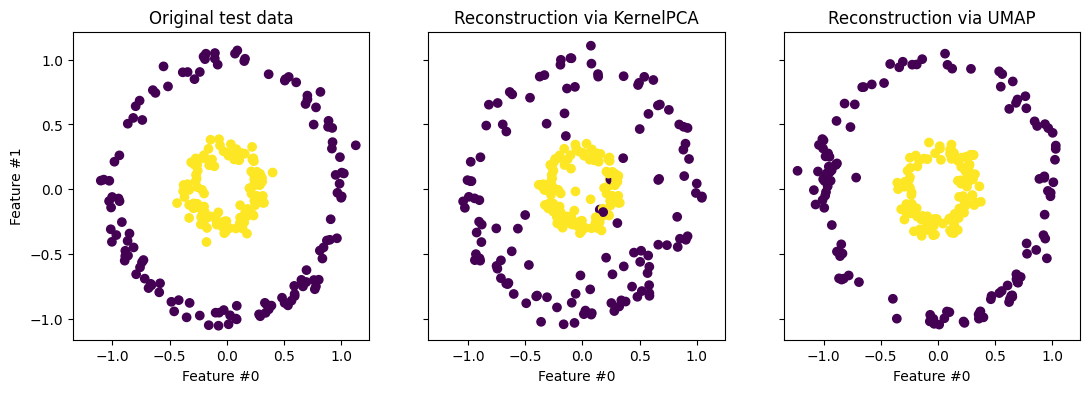

In [27]:
fig, (orig_data_ax, kernel_pca_back_proj_ax, umap_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

umap_back_proj_ax.scatter(
    X_reconstructed_umap[:, 0], X_reconstructed_umap[:, 1], c=y_test
)
umap_back_proj_ax.set_xlabel("Feature #0")
_ = umap_back_proj_ax.set_title("Reconstruction via UMAP")

## LLE (Local Linear Embedding) 

LLE es una técnica de reducción de dimensión basada en las vecindades locales. La técnica consiste en dos pasos:

- Primero encuentra los vecinos más cercanos de cada punto y estima pesos que reflejan cómo se relaciona cada muestra con sus vecinos.

$$\text{Minimiza:} \; \sum_i \left\|{\bf{x}}_i - \sum_j w_{ji}{\bf{x}}_j\right\|^2$$
$$\text{sujeto a:} \; \sum_j w_{ji} = 1$$

Es decir que estima los pesos de tal manera que cada punto se pueda expresar como una combinación lineal de sus vecinos más cercanos.

Posteriormente, encuentra vectores de representación en baja dimensión minimizando la función de coste:
  $$ \min_{\bf{y}} \sum_i \left\| {\bf{y}}_i - \sum_j w_{ij} {\bf{y}}_j \right\|^2 $$

LLE preserva las relaciones locales y es sensible al reuido y al tamaño de las vecindad.

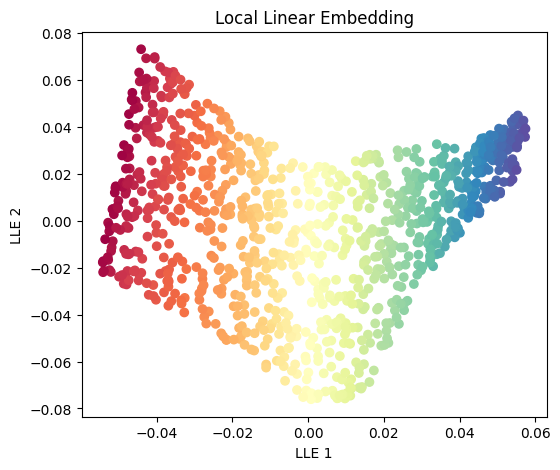

In [29]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Local Linear Embedding")
plt.xlabel("LLE 1")
plt.ylabel("LLE 2")
plt.show()

**En el segundo ejemplo...**

In [31]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
lle.fit(X_train)
X_test_lle = lle.transform(X_test)

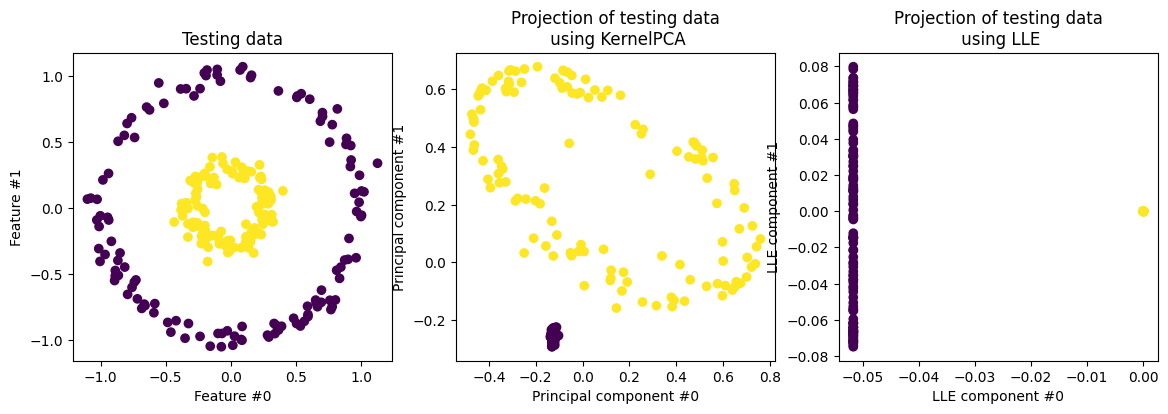

In [32]:
fig, (orig_data_ax, kernel_pca_proj_ax, lle_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

lle_proj_ax.scatter(X_test_lle[:, 0], X_test_lle[:, 1], c=y_test)
lle_proj_ax.set_ylabel("LLE component #1")
lle_proj_ax.set_xlabel("LLE component #0")
_ = lle_proj_ax.set_title("Projection of testing data\n using LLE")

## Comparison on MNIST Subset


Loading MNIST digits subset...


/Users/julian/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


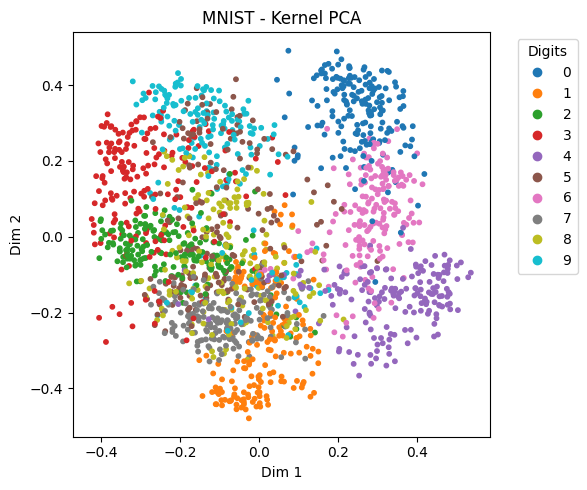

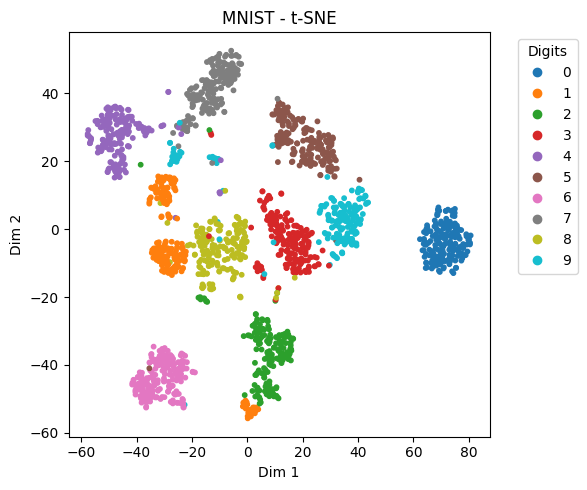

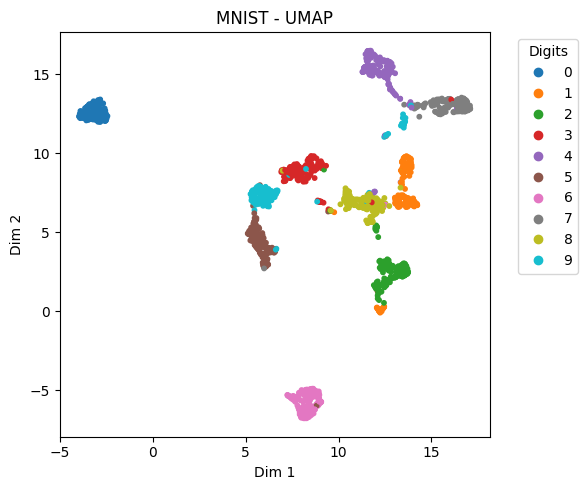

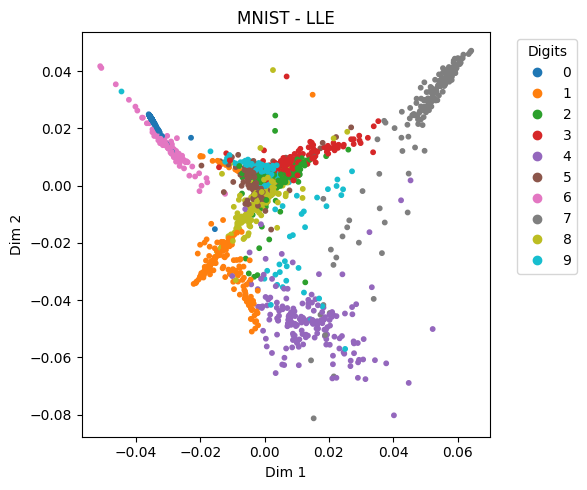

In [30]:
print("\nLoading MNIST digits subset...")
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
y_digits = digits.target

# Kernel PCA
X_digits_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01).fit_transform(X_digits)

# t-SNE
X_digits_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='random', random_state=42).fit_transform(X_digits)

# UMAP
X_digits_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_digits)

# LLE
X_digits_lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12).fit_transform(X_digits)

# Plotting function
def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.tab10, s=10)
    plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.tight_layout()
    plt.show()

# Visualizations
plot_embedding(X_digits_kpca, y_digits, "MNIST - Kernel PCA")
plot_embedding(X_digits_tsne, y_digits, "MNIST - t-SNE")
plot_embedding(X_digits_umap, y_digits, "MNIST - UMAP")
plot_embedding(X_digits_lle, y_digits, "MNIST - LLE")

**Hay muchos otros**: [Isomap](https://wearables.cc.gatech.edu/paper_of_week/isomap.pdf), [Laplacian eigenmaps](https://www2.imm.dtu.dk/projects/manifold/Papers/Laplacian.pdf), [Multidimensional Scaling](https://link.springer.com/chapter/10.1007/978-3-540-33037-0_14), etc.